In [1]:
%run functions.ipynb
from sklearn.neural_network import MLPClassifier

np.set_printoptions(precision=3)
np.random.seed(42)

%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import torch
from torch import nn, optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

We will try [fDNN](https://www.nature.com/articles/s41598-018-34833-6) model

In [3]:
labels = load_file("data/labels_for_microarray_data.csv")
labels = np.array(labels, dtype=np.int32)
dataset = load_file("data/microarray_data.csv")[:, 1:].T
print(labels.shape, dataset.shape)
X_train, X_test, y_train, y_test = load_train_and_test_parts()
print("Train and test sizes: {} {}".format(X_train.shape, X_test.shape))
print(
    "(1, 0) labels count in train test: {} {}".format(
        (np.count_nonzero(y_train == 1), np.count_nonzero(y_train == 0)),
        (np.count_nonzero(y_test == 1), np.count_nonzero(y_test == 0)),
    )
)
standarizer = StandardScaler().fit(X_train)
X_std_train = standarizer.transform(X_train)
X_std_test = standarizer.transform(X_test)

(969,) (969, 12179)
Train and test sizes: (726, 12179) (243, 12179)
(1, 0) labels count in train test: (289, 437) (104, 139)


Train and test scores: 0.8829201101928374 0.6995884773662552


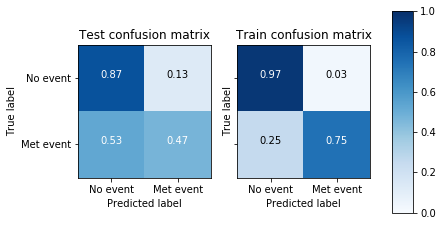

In [4]:
clf_forest = fit_clf(RandomForestClassifier(max_depth=4, n_estimators=500, min_samples_leaf=10), X_train, y_train, X_test, y_test)

In [5]:
def tree_representation(clf, data):
    result = np.zeros((data.shape[0], len(clf.estimators_)), dtype=np.int32)
    for i, tree in enumerate(clf.estimators_):
        result[:, i] = tree.predict(data)
    return result

In [6]:
X_tree_train = tree_representation(clf_forest, X_train)
X_tree_test = tree_representation(clf_forest, X_test)

Train and test scores: 0.9696969696969697 0.6872427983539094


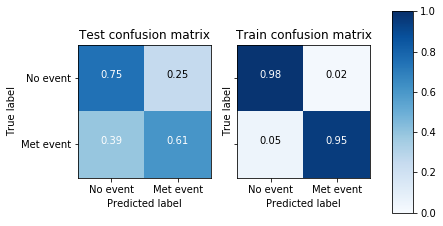

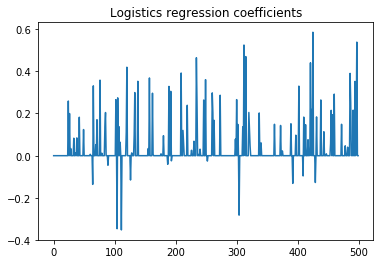

Train and test scores: 1.0 0.7160493827160493


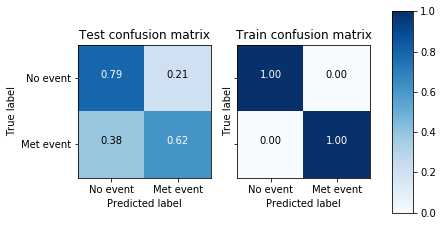

Train and test scores: 0.8953168044077136 0.6666666666666666


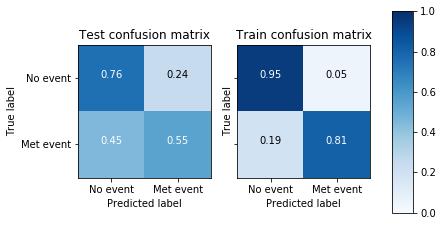

Train and test scores: 0.9421487603305785 0.7283950617283951


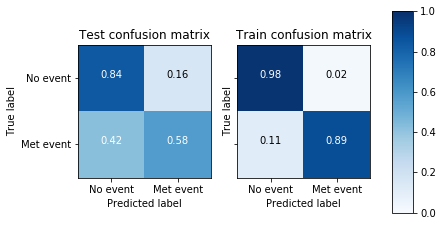

In [7]:
clf_logit = fit_models(X_tree_train, y_train, X_tree_test, y_test)

Train and test scores: 1.0 0.720164609053498


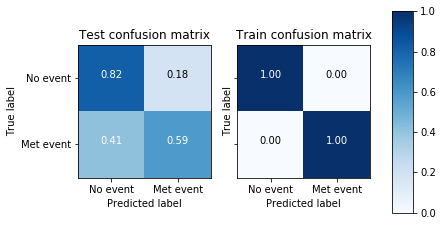

In [9]:
clf_nnet = MLPClassifier(hidden_layer_sizes=[X_tree_train.shape[1], 100], max_iter=1000)
clf_nnet = fit_clf(clf_nnet, X_tree_train, y_train, X_tree_test, y_test)